
# **Resources**

SentenceTransformers Documentation: https://www.sbert.net/

Pretrained Models for SentenceTransformers:https://www.sbert.net/docs/pretrained_models.html

Corpus and Algorithm idea from: https://stackoverflow.com/questions/55619176/how-to-cluster-similar-sentences-using-bert


# **Sentence Transformers installation**

 The "sentence-transformers" library is a Python package that provides pre-trained models for converting sentences or texts into dense vector representations. These vector representations, also known as embeddings, capture the semantic meaning of the input text.

In [ ]:
!pip install -U sentence-transformers

# **Tweet-preprocessor installation**
 The "tweet-preprocessor" package is a useful tool when working with tweet data, allowing you to preprocess and clean tweet text for a variety of applications, including text analysis, machine learning, data mining, and social media analytics.

In [ ]:
!pip install tweet-preprocessor

# **Loading the packages**

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import re
import preprocessor as p
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# **SentenceTransformer instance Initialization**
 Initialization of an instance of the SentenceTransformer class from the "sentence-transformers" package, specifically using the 'all-MiniLM-L6-v2' model as the underlying embedding model.

In [ ]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# **Read the Data**

In [ ]:
df = pd.read_csv('dataset.csv.txt')

df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# **True Values Extraction**
The extraction of true values(clusters numbers) in a list to use it later.

In [ ]:
trueValues=[]
for i in df["label"]:
  trueValues.append(i)
trueValues

# **Cleaning the dataset**

**Preprocessor** library provides functionality to clean and preprocess tweets, possibly by removing URLs, usernames, hashtags, and other unwanted elements from the tweet text.

In [ ]:
def clean_tweets(df):
    # punctuations we want to be replaced
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
    REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
    corpus = []
    for line in df:
        # clean data by sending it to tweet_processor
        sentence = p.clean(line)
        # remove puctuation
        sentence = REPLACE_NO_SPACE.sub("", sentence.lower()) # convert all tweets to lower cases
        sentence = REPLACE_WITH_SPACE.sub(" ", sentence)
        corpus.append(sentence)
    return corpus

We call the "clean_tweets" function and we add the values as a new column in the data frame to visualize the difference before and after cleaning.





In [ ]:
df['clean tweet'] = clean_tweets(df['tweet'])
df.head()

,id,label,tweet,clean tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now


# **Corpus list to manipulate**
We extract the values of 'clean_tweet' column in a list.

In [ ]:
corpus = list(df['clean tweet'])

# **Clustering**


Cluster 1: Positive/Neutral Sentiments on Various Topics

Cluster 2: Negative/Challenging Experiences and Topics


The code demonstrates how to use the embedder object (created from the SentenceTransformer class) to encode a corpus of sentences or texts into their corresponding embeddings.

Each element in corpus_embeddings will correspond to the embedding
representation of the corresponding sentence or text in the corpus. These embeddings capture the semantic meaning of the text and can be used for various downstream tasks such as similarity comparison, clustering, or as input to machine learning models.

NB: The dimensions and shape of the resulting corpus_embeddings may depend on the specific model used and the length of the input corpus.

In [ ]:
corpus_embeddings = embedder.encode(corpus)
corpus_embeddings

array([[-0.01858451, -0.00946122, -0.03774697, ...,  0.0614611 ,
         0.04655675, -0.00101867],
       [ 0.01542658, -0.03189151,  0.0056922 , ...,  0.04044088,
         0.05792318,  0.00691462],
       [ 0.01421267,  0.03794393,  0.06595623, ..., -0.03102796,
         0.04469711, -0.12437299],
       ...,
       [ 0.02433275, -0.00132224,  0.07572418, ...,  0.01338996,
         0.01394274,  0.00531578],
       [ 0.02262404,  0.15769066, -0.01022051, ..., -0.02673245,
        -0.00287162, -0.06593037],
       [ 0.03302019,  0.09289563,  0.06697232, ..., -0.07255658,
         0.04637523,  0.02193088]], dtype=float32)

# **K-Means Algorithm explication**

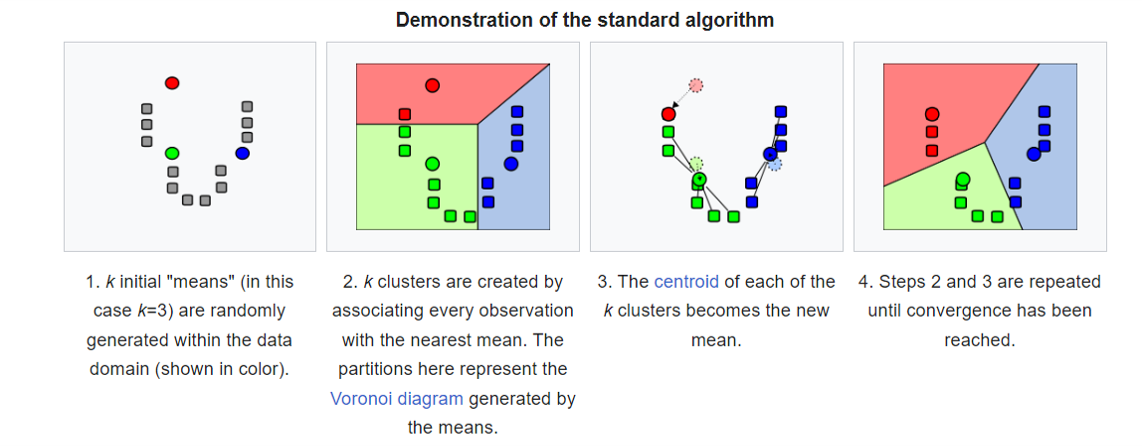

1.  Specifies the desired number of clusters (**num_clusters**) as 2
2.  Initializes a K-means clustering model (**clustering_model**) with the specified number of clusters.
3.  Fits the clustering model to the **corpus_embeddings**, which are dense vector representations of sentences.
4.  Obtains the cluster assignments for each embedding and stores them in the **cluster_assignment** variable.
5.  The resulting cluster_assignment array contains the cluster labels for each sentence embedding in **corpus_embeddings**.

In [ ]:
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_assignment

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

#**Cluster_df creation**

 We create a DataFrame "**cluster_df**" that contains the original sentences or texts in the '**corpus**' column, along with the corresponding cluster assignments in the '**cluster**' column.




In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,when a father is dysfunctional and is so selfi...,1
1,thanks for credit i cant use cause they dont o...,0
2,bihday your majesty,0
3,i love u take with u all the time in ur,0
4,factsguide society now,1


# **Prints the cluster number & the sentences within that cluster**
The code organizes the sentences from the corpus into their respective clusters, and then displays the sentences within each cluster. This can help you gain insights into the contents and patterns within each cluster.

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['thanks for credit i cant use cause they dont offer wheelchair vans in pdx', 'bihday your majesty', 'i love u take with u all the time in ur', 'camping tomorrow danny', 'we won love the land', 'welcome here  im its so ', 'i get to see my daddy today', 'i am thankful for having a paner', 'product of the day happy man tool whos its the  time to open up &amp drink up', 'beautiful sign by vendor for 4500', 'all when is  in  sunday love', 'happy fathers day', 'rip to the fellow nohern ireland fan who sadley passed away tonight gawa forever singing and cheering on fire', 'it was a hard monday due to cloudy weather disabling oxygen production for today', 'morning~~', 'oh  waited hours in the valravn line and it stopped working we were so close', 'i am thankful for sunshine', 'when you finally finish a book youve been working on for awhile', 'my mom shares the same bihday as bihday snake see you this weekend', 'lovely echeveria blooms', 'i am amazing', 'i love u take with u all the

#**Visualize random worlds from copus**

The code defines a function **word_cloud** that generates a word cloud visualization for a specified cluster in a DataFrame **pred_df**.

`wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])`: This line creates a string wc by joining all the corpus content from the '**corpus**' column of **pred_df** for the specified cluster (label).

**'WordCloud'** is a class from the wordcloud library, which allows you to create word cloud visualizations.


In [ ]:
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])#join all corpus columns content for the specified cluster(1 ou 0)
    wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

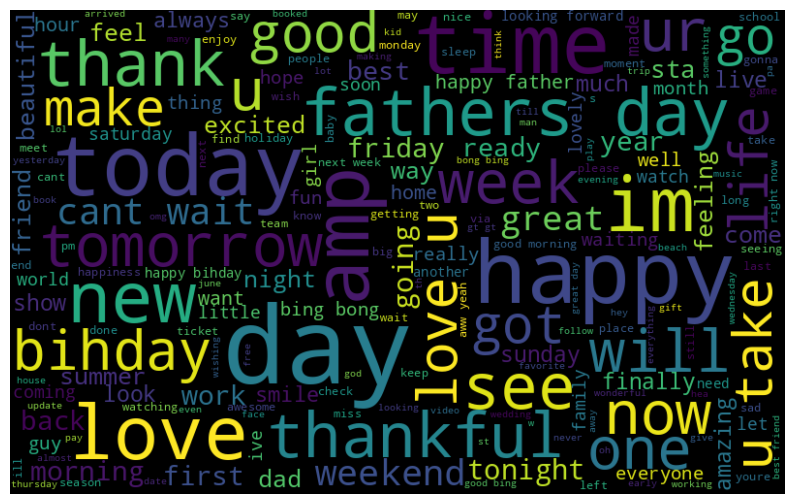

In [ ]:
word_cloud(cluster_df,0)

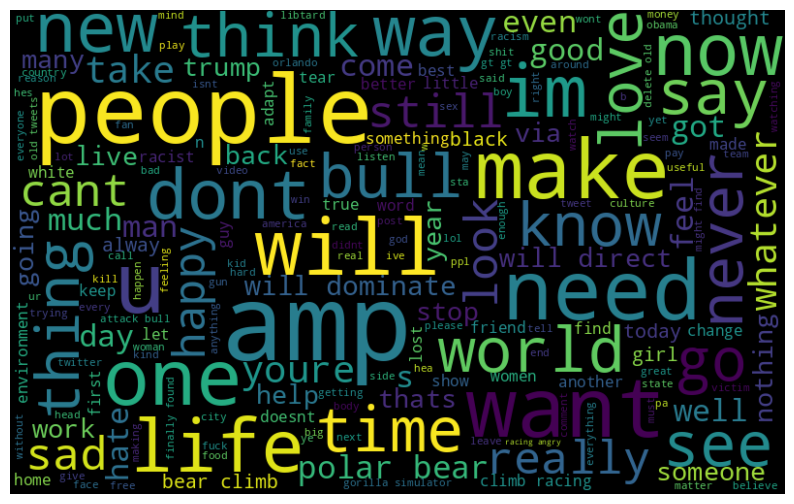

In [ ]:
word_cloud(cluster_df,1)

# **F_measure (F1-score)**
 F-measure score, which is a metric commonly used to evaluate the clustering performance. It quantifies the trade-off between precision and recall, providing a single value that represents the overall clustering quality. The higher the F-measure score, the better the clustering performance.

In [ ]:
from sklearn.metrics import f1_score

# Calculate F-measure
f_measure = f1_score(trueValues, cluster_assignment, average='weighted')

print("F-measure:", f_measure)

F-measure: 0.6736976763750183


# **Accuracy**
**'get_accuracy**' that calculates the accuracy score between the predicted values (predictions) and the true values (Y). It returns the accuracy score, which represents the proportion of correct predictions out of the total number of predictions.

In [ ]:
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / len(Y)

In [ ]:
a=get_accuracy(cluster_assignment,trueValues)
a

0.575933921531819

#**Silhouette_score**
The average Silhouette score is also used as an evaluation measure in clustering. The best silhouette score is 1 and the worst is -1. Values close to zero indicate that data points are on the boundary i.e overlapping the clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'corpus_embeddings' is the sentence representations and 'cluster_assignment' is the predicted clusters
silhouette_avg = silhouette_score(corpus_embeddings, cluster_assignment)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.023828557


# **Calinski_harabasz_score**
The Calinski-Harabasz index is a metric commonly used to evaluate the quality of clustering results. The index measures the ratio between the within-cluster dispersion and the between-cluster dispersion, where higher values indicate better-defined clusters and better clustering performance.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

calinski_score = calinski_harabasz_score(corpus_embeddings, cluster_assignment)
print("Calinski-Harabasz Index:", calinski_score)

Calinski-Harabasz Index: 743.6565345233432


# **Davies_bouldin_score**
The Davies Bouldin score provides insight into the separation and compactness of clusters. Lower scores indicate better clustering results, where each cluster is well-separated from others and internally cohesive.

In [ ]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score = davies_bouldin_score(corpus_embeddings, cluster_assignment)
print("Davies-Bouldin Index:", davies_bouldin_score)

Davies-Bouldin Index: 6.550705025011942
